# Analysis of DestinE User eXchange

## Python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import re
import multidict as multidict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Define Functions for plotting wordcloud and histograms

### Functions to create wordcloud based on word frequency

In [2]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


In [3]:
def makeImage(text, filename):

    wc = WordCloud(background_color="white", width=800, height=500, max_words=1000,  prefer_horizontal=1)
    # generate word cloud
    wc.generate_from_frequencies(text)
    wc.to_file(filename)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Bar plot

In [4]:
def barQ(col, df, output_filename):
    total = df.groupby(col).count()["ID"].sum() 
    dd = (df.groupby(col).count()["ID"]/total*100)
    ee = dd[~dd.index.str.contains('Other')]
    fig = sns.barplot(y = ee.index ,x=ee.values)
    plt.savefig(output_filename, bbox_inches='tight')

### Pie Chart

In [5]:
def pieQ(col, df, output_filename):
    total = df.groupby(col).count()["ID"].sum() 
    dd = (df.groupby(col).count()["ID"]/total*100)
    ee = dd[~dd.index.str.contains('Other')]
    explode = np.zeros(len(ee))
    explode[ee.argmax()] = 0.1
    palette_color = sns.color_palette('colorblind')
    plt.pie(ee.values, labels=ee.index, colors=palette_color,
        explode=explode, autopct='%.0f%%')
    plt.savefig(output_filename, bbox_inches='tight')

### Donut Chart

In [6]:
def donutQ(col, df, output_filename):
    total = df.groupby(col).count()["ID"].sum() 
    dd = (df.groupby(col).count()["ID"]/total*100)
    ee = dd[~dd.index.str.contains('Other')]
    palette_color = sns.color_palette('colorblind')
    plt.pie(ee.values, labels=ee.index, colors=palette_color,
            autopct='%.0f%%')
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.savefig(output_filename, bbox_inches='tight')

## Load input dataset

In [7]:
filename = "Survey 07.02.2023.xlsx"

In [8]:
df = pd.read_excel(filename)

In [9]:
df.head()

,ID,Name,Organization,1. Communities,2. How do we reach the relevant communities and raise awareness of the DestinE project?,"3. What are the best channels for communication/interaction with the already involved community, to keep them informed and the let the community grow?",4. With what frequency do you expect DestinE events to be organised?,5. How do we encourage contributions by the community?,6. What to do to facilitate the onboarding of a wider range of community members in Phase 2?,7. How would you like to get involved into DestinE?,8. What future use cases can be envisaged?,9. What would be the business demand to expect from Phase 2 onwards? And how should the project prepare/what should be put in place for that?,Do you provide your consent?,Phi-experience
0,294,"Benezeth, Isabelle",Mesr,NaN,Via existing platforms dedicated to the specif...,Via regular events,6 months,"Funding for project (e.g., use cases, events)",Collaboratively develop training/educational m...,Be a user of DestinE services,ocean and biodiversity preservation,NaN,Yes,Yes
1,304,"Bergsma, Erwin",Cnes,"Start-ups through LinkedIn, this is certainly ...",Via existing platforms dedicated to the specif...,Via DestinE website(s),Other - Perhaps once a year for now while incr...,Partnership opportunities,Collaboratively develop training/educational m...,Review and co-develop DestinE services,Environmental risk analyses including scenario...,NaN,Yes,Yes
2,305,"Brožková, Radmila",Czech Hydrometeorological Institute,NaN,Via existing platforms dedicated to the specif...,Via regular events,6 months,"Funding for project (e.g., use cases, events)",Collaboratively develop training/educational m...,Other - need more information,NaN,NaN,Yes,No
3,34,"Campanella, Paolo",Wasdi Sarl,I do not know if it is out of scope but maybe ...,"Via regular DestinE events (e.g., the DestinE ...",Via regular events,6 months,"Funding for project (e.g., use cases, events)",Identifying skill gaps,Review and co-develop DestinE services,NaN,NaN,Yes,Yes
4,300,"Castriotta, Adriana Grazia",Serco,ESA/ECMWF/EUMETSAT user groups,Via regular social media posts,Via regular events,9 months,Training opportunities and material,Collaboratively develop training/educational m...,Review and co-develop DestinE services,NaN,NaN,Yes,No


## Question 8:  What future use cases can be envisaged?

In [10]:
text = df["8. What future use cases can be envisaged?"].dropna()

In [11]:
t = " ".join(text.to_list())
t

'ocean and biodiversity preservation Environmental risk analyses including scenario and response training Land Pollution, Ocean Pollution, Polar Ice melt Streaming data and IoT data feeding relevant services, dashboards, statistics, maps, etc. a) Source for spatial distributed data -> to validate our Water Balance Model and enhance forecast quality\nb) algorithm fo deep data mining, compared with a huge data pool -> to predict water scarcity months a head by a statistic/AI approach TBD Wildfire investigations Modeling severe events in and around Europe A digital twin to Baltic sea risk of supply chain disruptions due to extreme events - Climate change impact simulation \n- Impact of urban growth on water consuption in arid and semiarid areas \n- Development of intelligence \ntransport networks \n- simulation of CO2 sequestation by landcover change \n city/metro-area level sims no idea forest(ry) A specific DestinE DT focussed on Urban DT. Provide KPIs to Smart Communities.\nDevelop sim

In [12]:
for w in ["domain",  "e.g.", "it ", "this ", "some", "providing", "may ", "not ", "can ", "like", "TBD", "user", "non ", "maybe", "might", "Streaming", "DT", "data", "events", "->", "platform", "groups", "communities", "community"]:
    t = t.replace(w, "")

TEXT =  
TEXT =  -
TEXT =  quality
TEXT =  b)
TEXT =  
TEXT =  transport
TEXT =  
TEXT =  
TEXT =  communities.
TEXT =  develop
TEXT =  antarctic.
TEXT =  we
TEXT =  
TEXT =  -
TEXT =  quality
TEXT =  b)
TEXT =  
TEXT =  transport
TEXT =  
TEXT =  
TEXT =  communities.
TEXT =  develop
TEXT =  antarctic.
TEXT =  we
TEXT =  
TEXT =  -
TEXT =  quality
TEXT =  b)
TEXT =  
TEXT =  transport
TEXT =  
TEXT =  
TEXT =  communities.
TEXT =  develop
TEXT =  antarctic.
TEXT =  we


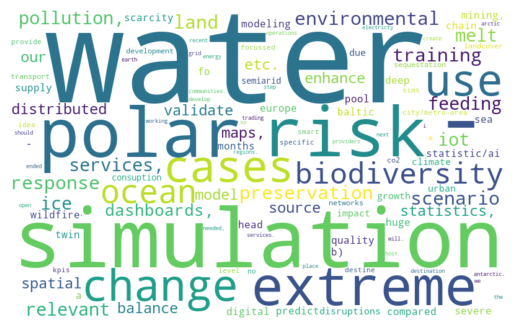

In [13]:
makeImage(getFrequencyDictForText(t), "Q8.png")

## Question 1: Communities

In [14]:
text = df["1. Communities"].dropna()
t = " ".join(text.to_list())

In [15]:
for w in ["domain",  "promote", "e.g.", "it ", "this ", "some", "providing", "may ", "not ", "can ", "like", "TBD", "user", "non ", "maybe", "might", "Streaming", "DT", "data", "events", "->", "platform", "groups", "communities", "community"]:
    t = t.replace(w, "")

TEXT =  sustainability.
TEXT =  
TEXT =  therefore,
TEXT =  sustainability.
TEXT =  
TEXT =  therefore,
TEXT =  sustainability.
TEXT =  
TEXT =  therefore,


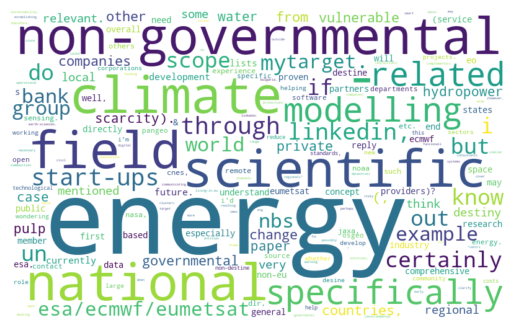

In [16]:
makeImage(getFrequencyDictForText(t), "Q1.png")

## Question 5: How do we encourage contributions by the community?

In [17]:
col = "5. How do we encourage contributions by the community?"

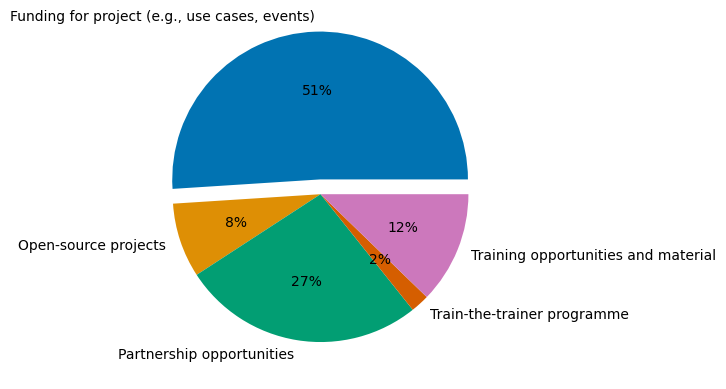

In [18]:
pieQ(col, df, "Q5_pie.png")

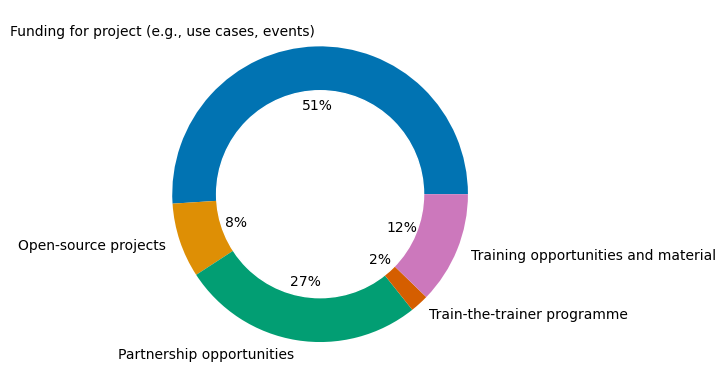

In [19]:
donutQ(col, df, "Q5_donut.png")

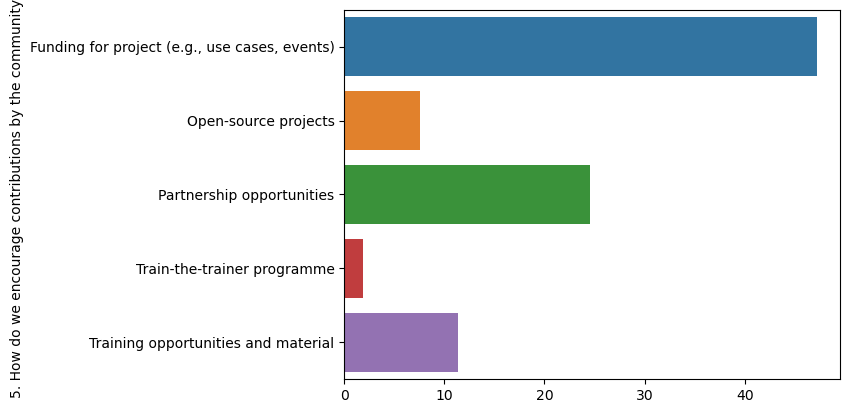

In [20]:
barQ(col, df, "Q5_bar.png")

## Question 7: How would you like to get involved into DestinE?

In [21]:
col = "7. How would you like to get involved into DestinE?"

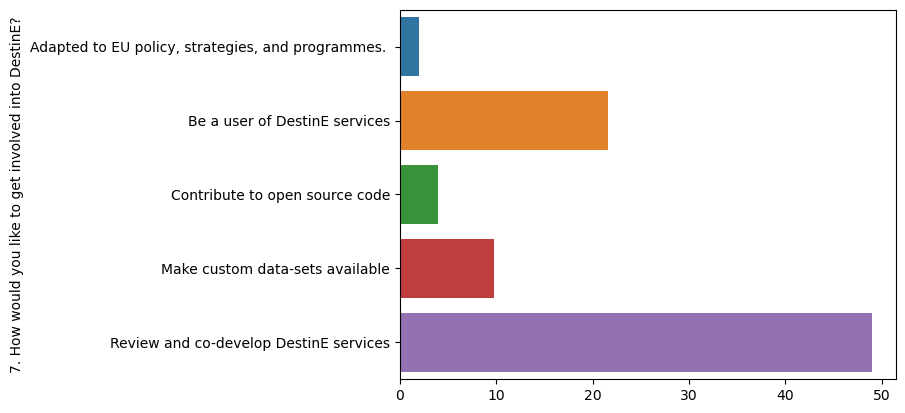

In [22]:
barQ(col, df, "Q7_bar.png")

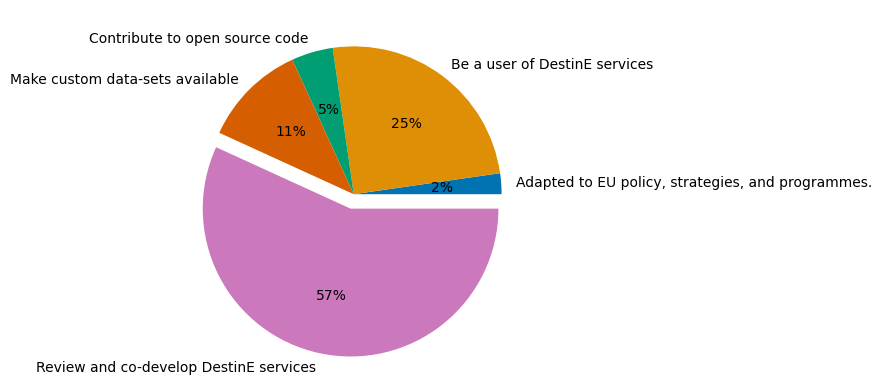

In [23]:
pieQ(col, df, "Q7_pie.png")

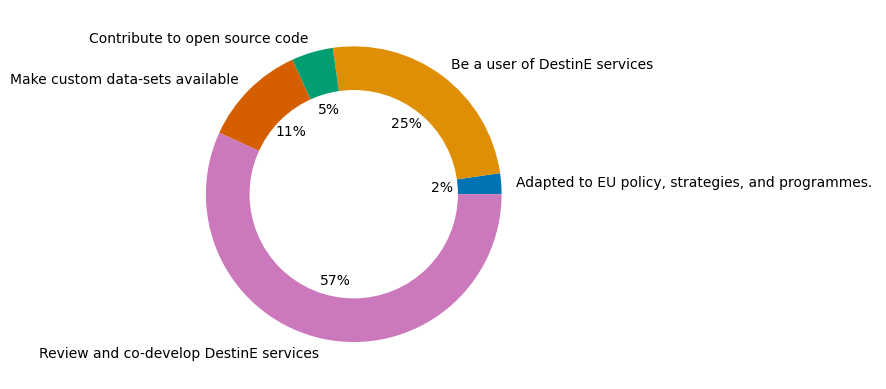

In [24]:
donutQ(col, df, "Q7_donut.png")

## Question 2: How do we reach the relevant communities and raise awareness of the DestinE project?

In [25]:
col = "2. How do we reach the relevant communities and raise awareness of the DestinE project?"

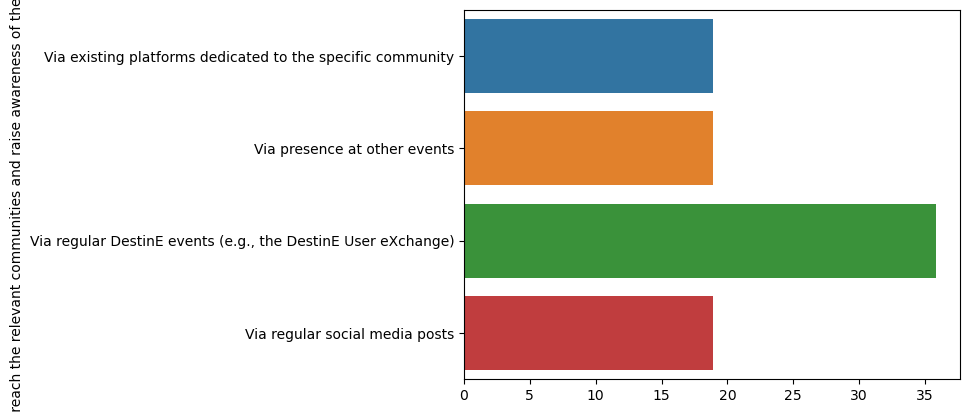

In [26]:
barQ(col, df, "Q2_bar.png")

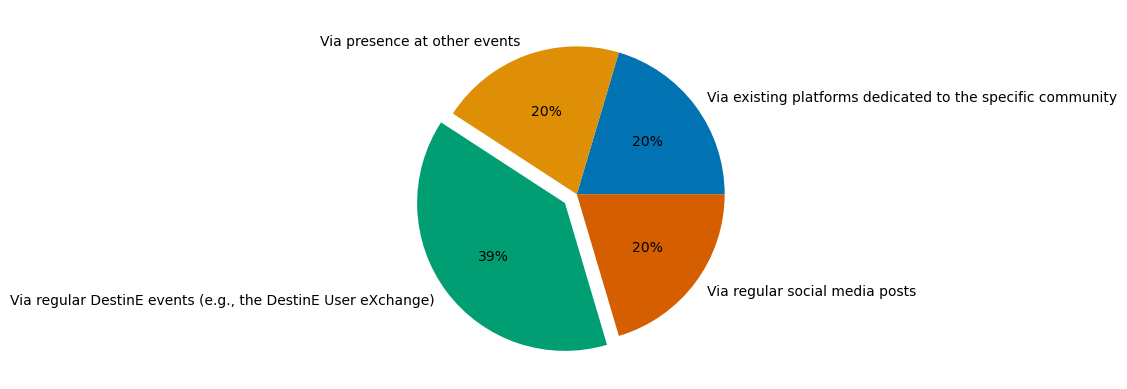

In [27]:
pieQ(col, df, "Q2_pie.png")

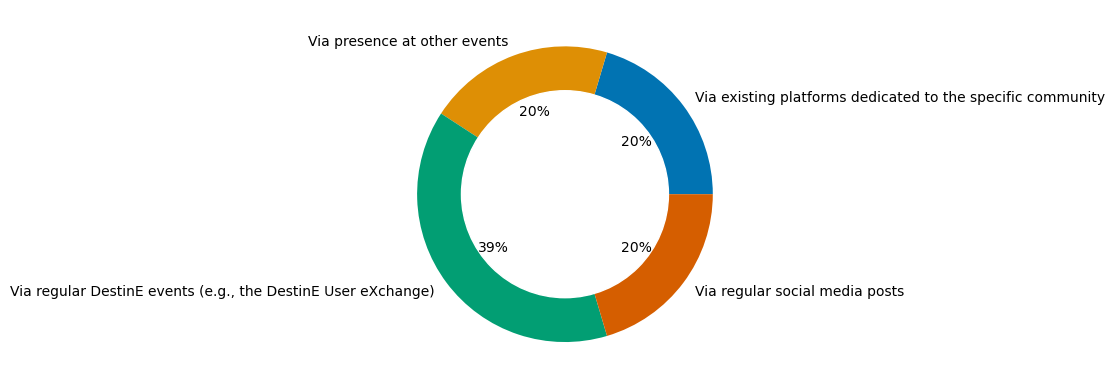

In [28]:
donutQ(col, df, "Q2_donut.png")

## Question 3: What are the best channels for communication/interaction with the already involved community, to keep them informed and the let the community grow?

In [29]:
col = "3. What are the best channels for communication/interaction with the already involved community, to keep them informed and the let the community grow?"

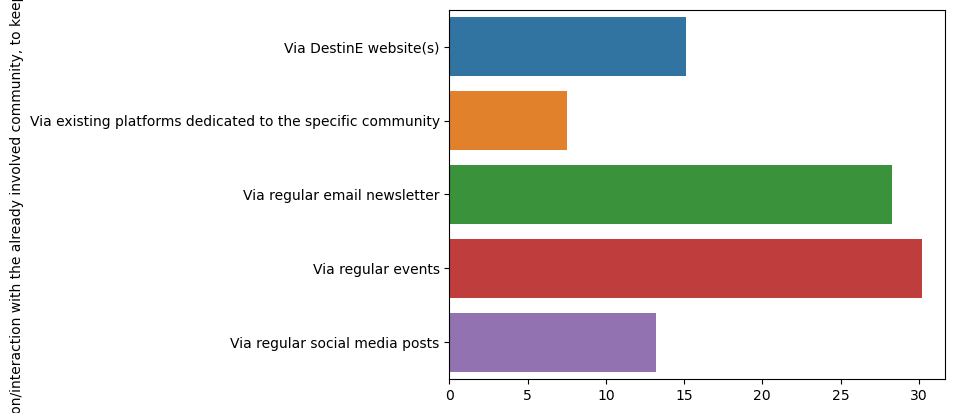

In [30]:
barQ(col, df, "Q3_bar.png")

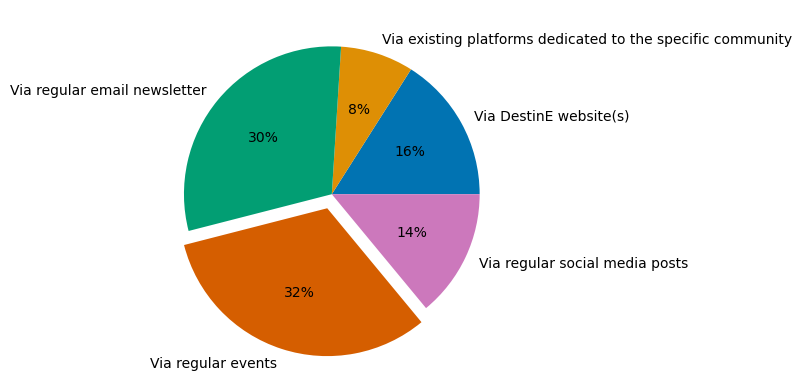

In [31]:
pieQ(col, df, "Q3_pie.png")

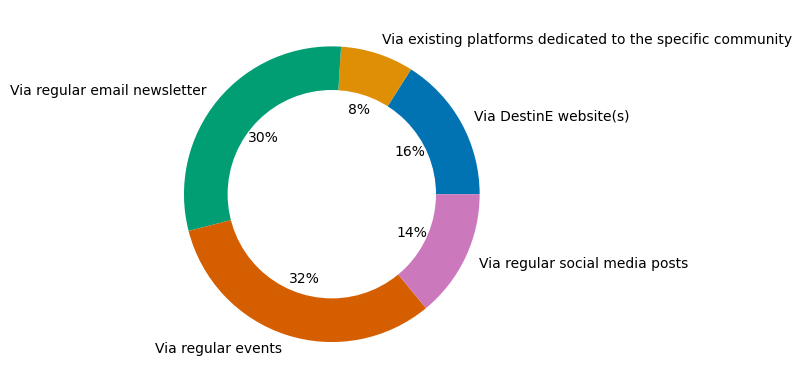

In [32]:
donutQ(col, df, "Q3_donut.png")

## Question 4: With what frequency do you expect DestinE events to be organised?

In [33]:
col = "4. With what frequency do you expect DestinE events to be organised?"

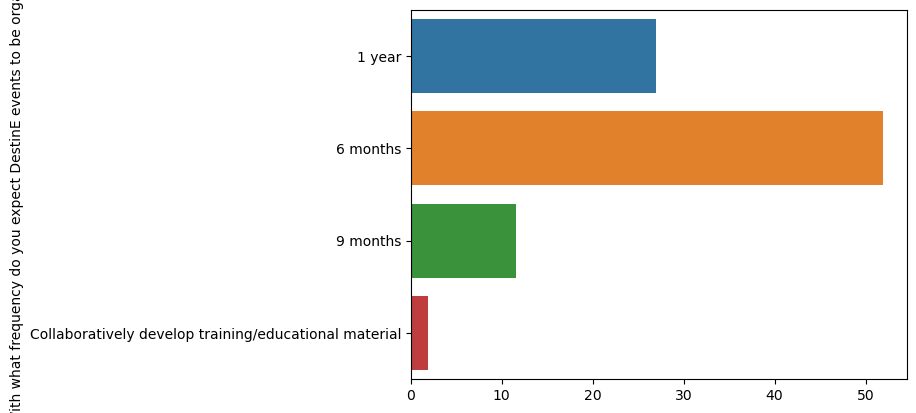

In [34]:
barQ(col, df, "Q4_bar.png")

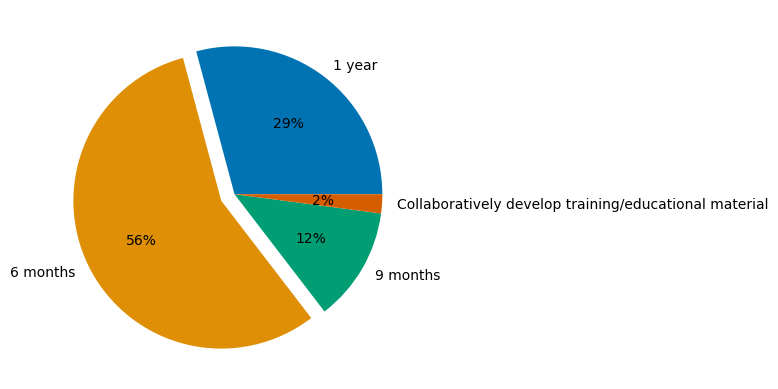

In [35]:
pieQ(col, df, "Q4_pie.png")

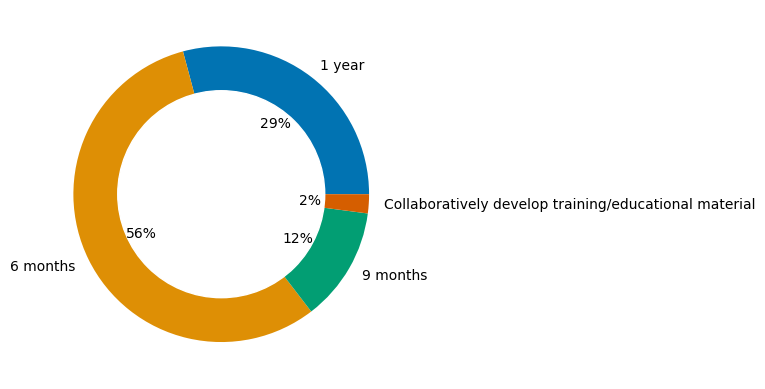

In [36]:
donutQ(col, df, "Q4_donut.png")